## Я выбрал реализацию перевода в другое цветовое пространство.

Алгоритм взял с Википедии https://ru.wikipedia.org/wiki/HSV_(цветовая_модель)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [2]:
img = imageio.imread('panda.jpg')
print(img.shape)

(394, 700, 3)


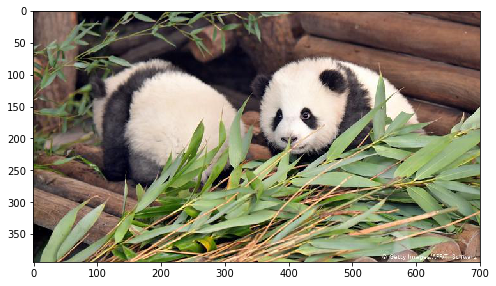

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [4]:
print(img[:5, :5, :])

[[[42 21 28]
  [39 18 25]
  [38 19 25]
  [38 21 27]
  [37 22 25]]

 [[52 31 38]
  [48 27 34]
  [46 27 33]
  [46 30 33]
  [45 29 32]]

 [[66 45 52]
  [61 42 48]
  [59 40 46]
  [58 42 45]
  [58 42 45]]

 [[77 58 64]
  [73 54 60]
  [70 51 57]
  [70 54 57]
  [69 53 56]]

 [[82 63 69]
  [79 60 66]
  [75 59 62]
  [78 62 65]
  [78 62 65]]]


In [11]:
def _rgb2hsv_1pixel(r,g,b):
    # r, g, b от 0 до 255
    # h, s, v от 0 до 1
    r, g, b = r/255.0, g/255.0, b/255.0
    _min = min(r,g,b)
    _max = max(r,g,b)
    _dif = _max - _min
    
    if _min == _max:
        h = 0
    elif _max == r and g >= b:
        h = 60 * (g - b) / _dif + 0
    elif _max == r and g < b:
        h = 60 * (g - b) / _dif + 360
    elif _max == g:
        h = 60 * (b - r) / _dif + 120
    else: # _max == b
        h = 60 * (r - g) / _dif + 240
    h /= 360.0
    
    if _max == 0:
        s = 0
    else:
        s = 1 - _min/_max
    
    v = _max
    
    return h, s, v

def rgb2hsv(img):
    img_hsv = np.zeros(img.shape, dtype=np.float32)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] = _rgb2hsv_1pixel(img[i,j,0], img[i,j,1], img[i,j,2])
    
    return img_hsv

In [25]:
def _hsv2rgb_1pixel(h,s,v):
    # h, s, v от 0 до 1
    # r, g, b от 0 до 255
    h, s, v = 360*h, 100*s, 100*v
    _h_i = int(h / 60) % 6
    _v_min = (100 - s) * v / 100
    _a = (v - _v_min)* (h % 60) / 60
    _v_inc = _v_min + _a
    _v_dec = v - _a
    
    if _h_i == 0:
        r = v
        g = _v_inc
        b = _v_min
    elif _h_i == 1:
        r = _v_dec
        g = v
        b = _v_min
    elif _h_i == 2:
        r = _v_min
        g = v
        b = _v_inc
    elif _h_i == 3:
        r = _v_min
        g = _v_dec
        b = v
    elif _h_i == 4:
        r = _v_inc
        g = _v_min
        b = v
    else: # _h_i == 5
        r = v
        g = _v_min
        b = _v_dec
    
    return int(r*255/100), int(g*255/100), int(b*255/100)

def hsv2rgb(img):
    img_rgb = np.zeros(img.shape, dtype=np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_rgb[i,j,0], img_rgb[i,j,1], img_rgb[i,j,2] = _hsv2rgb_1pixel(img[i,j,0], img[i,j,1], img[i,j,2])
    
    return img_rgb

In [14]:
img_hsv = rgb2hsv(img)

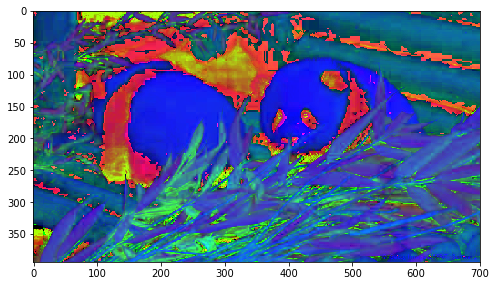

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

In [26]:
img_rgb = hsv2rgb(img_hsv)

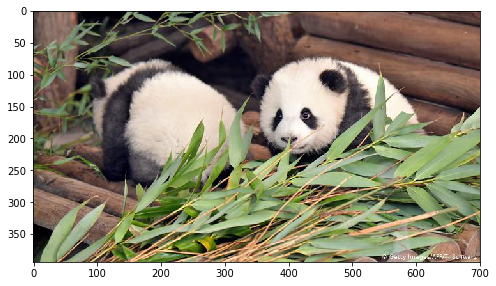

In [27]:
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)

### Сравнение с библиотечной функцией

In [18]:
from skimage.color import rgb2hsv, hsv2rgb

In [28]:
img_hsv_lib = rgb2hsv(img)

In [29]:
# Есть расхождения из-за точности, поэтому сравниваю на "почти" равно
np.allclose(img_hsv, img_hsv_lib, 1e-05, 1e-08)

True

In [45]:
img_rgb_lib = hsv2rgb(img_hsv)

In [49]:
np.sum(img_rgb_lib != img_rgb)

0